## Introduction

Churn prediction analysis is a widely used technique involving the use of machine learning models to predict whethe a customer will stay associated with an organization of the customer leaves. This technique is widely utilized by banks who wish to retain their customers. In this notebook we will carry out the study related to the trends in churn and what necessary steps can be taken to ensure its reduction . We will use Kaggle as the source for the data.

SCOPE
- Exploratory Data Analysis
- To predict whether a Customer continues with their account or closes it

The dataset contains imbalanced data as there are more samples for people who did not churn as compared to samples that churned. To tackle the problem of class imbalance we have employed to techniques.

- Used recall instead of accuracy as the evaluation metric
- Used SMOTE ENN as a sampling technique.

Kaggle Dataset: https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction

In [640]:
#Importing Datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING DATASET

In [641]:
#Read the csv
data = pd.read_csv('Churn_Modelling.csv')
results = {}
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.000,2,0.000,1,1.000,1.000,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41.000,1,83807.860,1,0.000,1.000,112542.580,0
2,3,15619304,Onio,502,France,Female,42.000,8,159660.800,3,1.000,0.000,113931.570,1
3,4,15701354,Boni,699,France,Female,39.000,1,0.000,2,0.000,0.000,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43.000,2,125510.820,1,NaN,1.000,79084.100,0


In [642]:

#Dropping CustomerId and Surname as they don't contribute significantly in the analysis and modeling
data.drop(['RowNumber','CustomerId', 'Surname'], axis=1, inplace=True)

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.000,2,0.000,1,1.000,1.000,101348.880,1
1,608,Spain,Female,41.000,1,83807.860,1,0.000,1.000,112542.580,0
2,502,France,Female,42.000,8,159660.800,3,1.000,0.000,113931.570,1
3,699,France,Female,39.000,1,0.000,2,0.000,0.000,93826.630,0
4,850,Spain,Female,43.000,2,125510.820,1,NaN,1.000,79084.100,0


### Exploratory Data Analysis

It is important that the banks are able to recognize the customers that are about to exit from the bank and start their business elsewhere. This is important so that the companies can try to sway the clients to not leave the bank

The data set contains the numerical and categorical features of different clients. The dataset is highly unbalanced, the positive class (exited) account for 20% of all samples. 

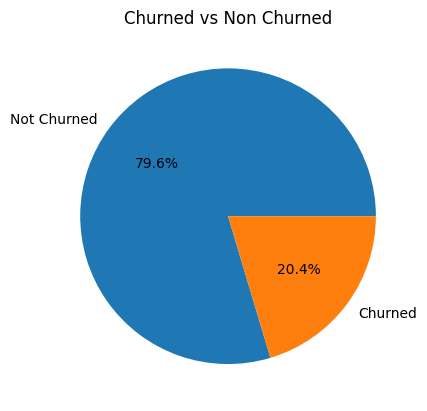

In [643]:
plt.pie(data['Exited'].value_counts(), labels=['Not Churned','Churned'], autopct='%1.1f%%')
plt.title('Churned vs Non Churned')
plt.show()

In [644]:
#We have set the format of numeric values to allow for 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000,10001.000,10002.000,10002.000,10002.000,10001.000,10001.000,10002.000,10002.000
mean,650.555,38.922,5.012,76491.113,1.530,0.706,0.515,100083.331,0.204
std,96.662,10.487,2.892,62393.474,0.582,0.456,0.500,57508.118,0.403
min,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,584.000,32.000,3.000,0.000,1.000,0.000,0.000,50983.750,0.000
50%,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100185.240,0.000
75%,718.000,44.000,7.000,127647.840,2.000,1.000,1.000,149383.652,0.000
max,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


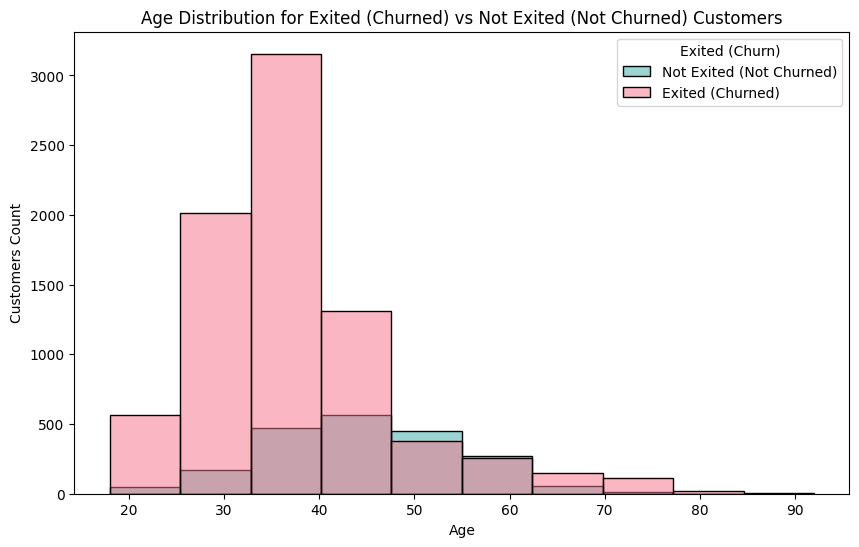

In [645]:
# Plotting Relationship between Age and Exited
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Exited', bins=10, palette='husl')
plt.title('Age Distribution for Exited (Churned) vs Not Exited (Not Churned) Customers')
plt.xlabel('Age')
plt.ylabel('Customers Count')
plt.legend(title='Exited (Churn)', labels=['Not Exited (Not Churned)', 'Exited (Churned)'])
plt.show()

Overall, this visualization helps in understanding how the distribution of customer ages differs between those who churned and those who did not churn. It allows for the identification of any patterns or differences in age distribution that may be associated with customer churn behavior. For instance, if the histograms for churned and not churned customers exhibit distinct patterns or shapes, it suggests that there are differences in the age distribution between the two groups. For example, if the histogram bars  for churned customers are shifted towards younger ages or have a different peak compared to not churned customers, it indicates that younger customers may be more likely to churn. Conversely, if the age distributions for churned and not churned customers overlap significantly or show similar patterns, it suggests that age may not be a significant factor influencing churn behavior.In summary, the visualization facilitates the comparison of age distribution between churned and not churned customers, offering insights into the potential influence of age on churn behavior and guiding decision-making for customer retention strategies.

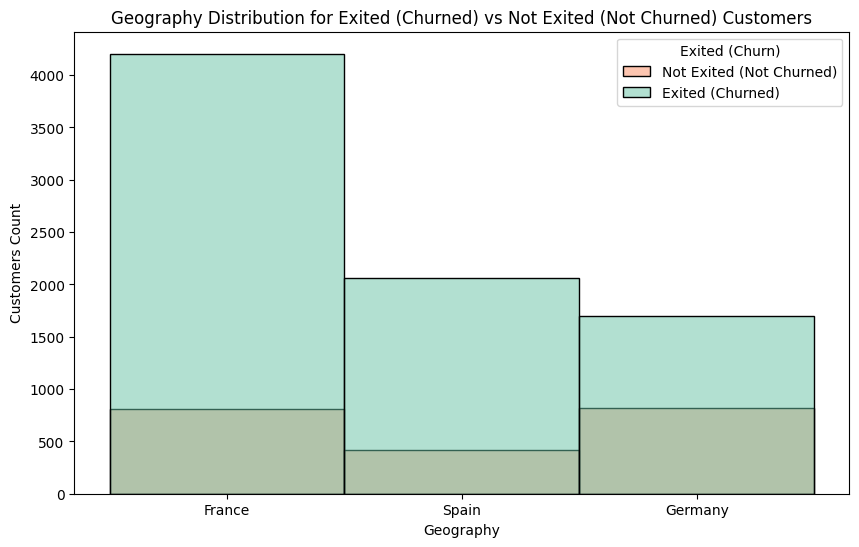

In [646]:
# Plotting Relationship between Geography and Exited
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Geography', hue='Exited', bins=10, palette='Set2')
plt.title('Geography Distribution for Exited (Churned) vs Not Exited (Not Churned) Customers')
plt.xlabel('Geography')
plt.ylabel('Customers Count')
plt.legend(title='Exited (Churn)', labels=['Not Exited (Not Churned)', 'Exited (Churned)'])
plt.show()

### Explanation

Overall, this visualization helps in understanding how the distribution of customers across different geographical regions differs between those who churned and those who did not churn. It allows for the identification of any geographical patterns or trends associated with churn behavior. By examining the histogram, you can observe how the distribution of customers across different geographical regions varies between churned and not churned customers.
Differences in the height or shape of the histogram bars between the two groups indicate variations in customer distribution across geographical regions. For example, if certain geographical regions have higher frequencies of churned customers compared to not churned customers, it suggests that those regions may be more prone to churn. Analyzing these differences in customer distribution can provide insights into the potential influence of geography on churn behavior.
It helps in understanding whether certain geographical regions are associated with higher or lower churn rates and guides decision-making for targeted strategies to mitigate churn in specific regions. In summary, the visualization helps in understanding how the distribution of customers across different geographical regions differs between those who churned and those who did not churn, providing insights into geographical patterns or trends associated with churn behavior.

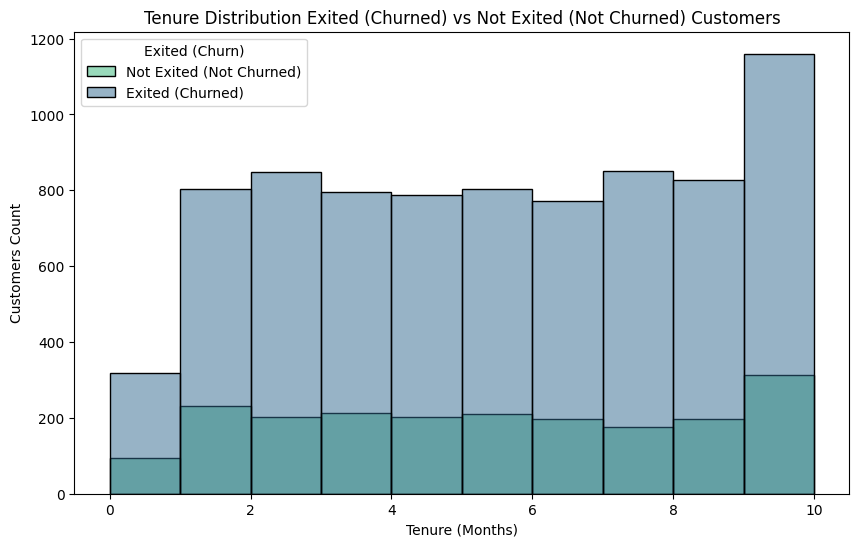

In [647]:
# Plotting Relationship between Tenure and Exited
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Tenure', hue='Exited', bins=10, palette='viridis')
plt.title('Tenure Distribution Exited (Churned) vs Not Exited (Not Churned) Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Customers Count')
plt.legend(title='Exited (Churn)', labels=['Not Exited (Not Churned)', 'Exited (Churned)'])
plt.show()

Overall, this visualization helps in understanding how the distribution of customers' tenure (duration of customer relationship) differs between those who churned and those who did not churn. By examining the histogram, you can observe how the distribution of customers' tenure differs between churned and not churned customers.
Differences in the shape, height, or spread of the histograms between the two groups indicate variations in customers' tenure distribution. If certain tenure intervals have higher frequencies of churned customers compared to not churned customers, it suggests that customers with certain durations of the customer relationship are more likely to churn.
Conversely, if the tenure distributions for churned and not churned customers are similar, it suggests that tenure may not be a significant factor influencing churn behavior. Analyzing these differences in customers' tenure distribution provides insights into the relationship between tenure and churn behavior. It helps in identifying whether customers with longer or shorter tenures are more prone to churn, guiding strategies for customer retention and engagement. In summary, the visualization facilitates the comparison of customers' tenure distribution between churned and not churned customers, offering insights into how the duration of the customer relationship influences churn behavior.

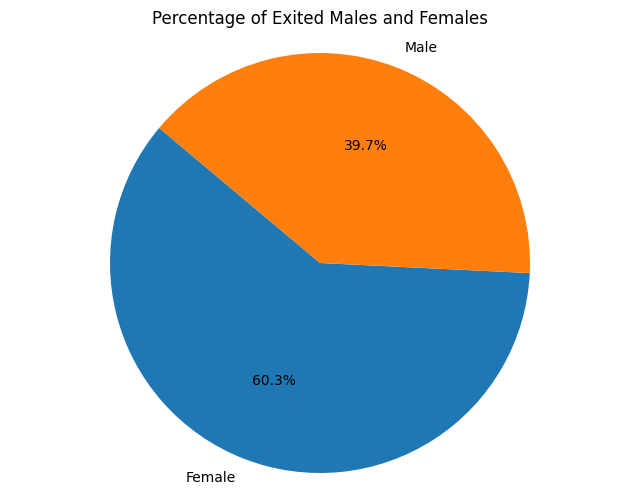

In [648]:
# Plotting Relationship between Gender and Exited
gender_exits = data.groupby('Gender')['Exited'].mean() * 100
plt.figure(figsize=(8, 6))
plt.pie(gender_exits, labels=gender_exits.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Exited Males and Females')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Overall, this visualization provides a clear comparison of the churn (exit) rates between male and female customers. The pie chart allows you to quickly understand the distribution of churned customers based on gender, making it easy to identify any differences or patterns between the two gender categories.

### DATA PREPROCESSING

The data should be cleaned properly because uncleansed data can affect the accuracy of the model.
1. Elimination of null values
2. Transforming categorical values into numerical values
3. Eliminating redundant (duplicated) data

In [649]:
# Checking for duplicated values
print('The number of duplicated values are:',data.duplicated().sum())

# Checking for null values
print('No of Missing values')
print(data.isna().sum())

The number of duplicated values are: 2
No of Missing values
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


In [650]:
# dropping the duplicated values
data.drop_duplicates(inplace=True)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.000,2,0.000,1,1.000,1.000,101348.880,1
1,608,Spain,Female,41.000,1,83807.860,1,0.000,1.000,112542.580,0
2,502,France,Female,42.000,8,159660.800,3,1.000,0.000,113931.570,1
3,699,France,Female,39.000,1,0.000,2,0.000,0.000,93826.630,0
4,850,Spain,Female,43.000,2,125510.820,1,NaN,1.000,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39.000,5,0.000,2,1.000,0.000,96270.640,0
9996,516,France,Male,35.000,10,57369.610,1,1.000,1.000,101699.770,0
9997,709,France,Female,36.000,7,0.000,1,0.000,1.000,42085.580,1
9998,772,Germany,Male,42.000,3,75075.310,2,1.000,0.000,92888.520,1


In [651]:
#Separate data into feature set and target vector

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42.000,2,0.000,1,1.000,1.000,101348.880
1,608,Spain,Female,41.000,1,83807.860,1,0.000,1.000,112542.580
2,502,France,Female,42.000,8,159660.800,3,1.000,0.000,113931.570
3,699,France,Female,39.000,1,0.000,2,0.000,0.000,93826.630
4,850,Spain,Female,43.000,2,125510.820,1,NaN,1.000,79084.100


### Train Test Split

We need to split the data using stratified splitting strategy in order to have the same percentages of classes in each of the splits.

In [652]:
from sklearn.model_selection import train_test_split

#Since there is a class imbalance we will use stratified splitting, we make sure that we have both classes in our split 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.3)

### Encoded Preprocessing and Imputation
Preprocessor is a Column Transformer with:

- numerical pipeline containing SimpleImputer(median) and StandardScalar
- categorical pipeline containing SimpleImputer(most_frequent) and OneHotEncoder

In [653]:
#Creating pipelines to encode, impute and scale the data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
categorical_features = ['Geography','Gender','HasCrCard','IsActiveMember']

num_features = Pipeline(steps=[
    ('numerical', SimpleImputer(strategy = 'median')),
    ('scaling', StandardScaler())
])

cat_features = Pipeline(steps=[
    ('categorical', SimpleImputer(strategy='most_frequent')),
    ('enc', OneHotEncoder())

])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_features, numerical_features),
    ('cat', cat_features, categorical_features)
])

### BASELINE (no Oversampling)

The best model is not the one that gives accurate predictions on the training data, but the one which gives good predictions on the new data and avoids overfitting and underfitting.

### Stratified K-Fold  CV 
Stratification is used when the datasets contain unbalanced classes. Therefore if we cross-validate with a normal technique it may produce subsamples that have a varying distribution of classes.

In [654]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

#We are going to ensure that we have the same splits of the data every time. 
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = StratifiedKFold(n_splits=5, shuffle=False)

### Setting up Pipeline Object

Notes:
- Pipeline has two steps: preprocessing and classifier
- use preprocessor and KNeighborClassifier as placeholders

In [655]:
from sklearn.neighbors import KNeighborsClassifier

# Creating the pipeline object
pipe1 = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', KNeighborsClassifier())
])

### Optimizing Recall

Recall: <b>The ability of a model to find all the relevant cases within a data set</b>. The number of true positives divided by the number of true positives plus the number of false negatives.

In our case, the client has identified that they want to avoid false negative as much as possible. Losing a client will cost the bank more than convincing the clients to stay loyal to the bank. In this use case, a false positive (identifying someone will exit if they are not likely to exit) is not as important as identifying the customers that will exit



In [656]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(pipe1, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall scores are: [0.36363636 0.40350877 0.44210526 0.38245614 0.44561404]
Average Cross Validation Recall score: 0.40746411483253586


### Hyperparameter Using GridSearchCV

We can tune the baseline model to the correct hyperparameters using the Grid search.The “best” parameters that GridSearchCV identifies are technically the best that could be produced, but only by the parameters that you included in your parameter grid.

In [657]:
# Selecting the grid paramter for the baseline model

param_grid_knn = [
    {
        'classifier': [KNeighborsClassifier()],
        'preprocessing': [preprocessor],
        'classifier__n_neighbors':[4, 5, 7,9]
    }
]

In [658]:
from sklearn.model_selection import GridSearchCV

grid_knn = GridSearchCV(pipe1, param_grid=param_grid_knn, cv=kf, 
                          scoring='recall',return_train_score=True).fit(X_train, y_train)

In [659]:
print('Best parameters:', grid_knn.best_params_)
print('Best score:', grid_knn.best_score_)
# Best cross validation training score
print("Best cross-validation train score: {:.2f}".format(grid_knn.cv_results_['mean_train_score'][grid_knn.best_index_]))


Best parameters: {'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 5, 'preprocessing': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('numerical',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('categorical',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('enc', OneHotEncoder())]),
                                 ['Geography', 'Gender', 'HasCrCard',
                                  'IsActiveMember'])])}
Best score: 0.40746411483253

We have about 40% Recall on one of our models before oversampling. Let's check the test set scores.

In [660]:
from sklearn.metrics import  recall_score, precision_score, f1_score, accuracy_score

'''
    Computes the performance on the test set

    Args:
        est: the fitted estimator 
        X_test: The unseen test data
    
    Returns:
        Score dataframe with the monitored metrics
'''

def compute_test_score(est, X_test):
    y_pred = est.predict(X_test)

    Recall = recall_score(y_test, y_pred)
    Precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    ndf = [(Recall, Precision, f1, accuracy)]

    score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
    

    return score


In [661]:
knn_score = compute_test_score(grid_knn,X_test)
knn_score.insert(0,'KNN with','No Sampling')
knn_score


,KNN with,Recall,Precision,F1 Score,Accuracy
0,No Sampling,0.406,0.656,0.502,0.836


The results from the baseline model are quite bad and there is significant overfitting. Lets try a more advanced model such as tree based Random Forest model without sampling and see how they are working in comparison to the baseline model using grid search

In [662]:

from sklearn.ensemble import RandomForestClassifier

param_grid_rf = [

    {
        'classifier': [RandomForestClassifier(random_state= 0)],
        'preprocessing': [preprocessor],
        'classifier__n_estimators':[100,200,300],
        'classifier__max_features':[7,9,11],
        'classifier__max_depth':[5,7,9]
    }
]

In [663]:
grid_rf = GridSearchCV(pipe1, param_grid=param_grid_rf, cv=kf, 
                          scoring='recall', n_jobs=-1, return_train_score=True).fit(X_train, y_train)

In [664]:
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)
# Best cross validation training score
print("Best cross-validation train score: {:.2f}".format(grid_rf.cv_results_['mean_train_score'][grid_rf.best_index_]))

Best parameters: {'classifier': RandomForestClassifier(max_depth=9, max_features=11, n_estimators=200,
                       random_state=0), 'classifier__max_depth': 9, 'classifier__max_features': 11, 'classifier__n_estimators': 200, 'preprocessing': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('numerical',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('categorical',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('enc', OneHotEncoder())]),
    

In [665]:
rf_score = compute_test_score(grid_rf,X_test)
rf_score.insert(0,'Random Forest with','No Sampling')
rf_score


,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,No Sampling,0.455,0.762,0.570,0.860


As it can be seen from the results, the tree based model perform better for the minority class, there is still overfitting. The recall when the positive label is 1 is very low.  

One way to increase recall is to using the different sampling techniques to oversample or undersample the data. We can oversample the minority class using replacement. We can randomly delete rows from the majority class to match them with the minority class which is called undersampling

The following sampling techniques will be used
- Random Oversampling: Randomly duplicate examples in the minority class.
- Random Under Sampling: Randomly delete examples in the majority class.
- Specialized Over Sampling Technique

### Random Over Sampling

In [666]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

ros = RandomOverSampler(random_state=0)

#Creating the pipeline with resampling as the second step
pipe_oversampling = Pipeline(
    steps=[
        ('preprocessing', preprocessor),
        ('resample',ros),
        ('classifier', KNeighborsClassifier())
    ]

)

In [667]:
grid_knn_os = GridSearchCV(pipe_oversampling, param_grid=param_grid_knn, cv=kf, 
                          scoring='recall', return_train_score=True).fit(X_train, y_train)

In [668]:
print('Best parameters:', grid_knn_os.best_params_)
print('Best score:', grid_knn_os.best_score_)
# Best cross validation training score
print("Best cross-validation train score: {:.2f}".format(grid_knn_os.cv_results_['mean_train_score'][grid_knn_os.best_index_]))

Best parameters: {'classifier': KNeighborsClassifier(n_neighbors=9), 'classifier__n_neighbors': 9, 'preprocessing': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('numerical',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('categorical',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('enc', OneHotEncoder())]),
                                 ['Geography', 'Gender', 'HasCrCard',
                                  'IsActiveMember'])])}
Best score: 0.6

In [669]:
knn_os_score = compute_test_score(grid_knn_os, X_test)
knn_os_score.insert(0,'KNN with','Over Sampling')
knn_os_score

,KNN with,Recall,Precision,F1 Score,Accuracy
0,Over Sampling,0.689,0.429,0.529,0.750


Recall has increased although there is significant overfitting of the data. 

In [670]:
grid_rf_os = GridSearchCV(pipe_oversampling, param_grid=param_grid_rf, cv=kf, 
                          scoring='recall', n_jobs=-1, return_train_score=True).fit(X_train, y_train)

In [671]:
print('Best parameters:', grid_rf_os.best_params_)
print('Best score:', grid_rf_os.best_score_)
# Best cross validation training score
print("Best cross-validation train score: {:.2f}".format(grid_rf_os.cv_results_['mean_train_score'][grid_rf_os.best_index_]))

Best parameters: {'classifier': RandomForestClassifier(max_depth=7, max_features=11, n_estimators=300,
                       random_state=0), 'classifier__max_depth': 7, 'classifier__max_features': 11, 'classifier__n_estimators': 300, 'preprocessing': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('numerical',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('categorical',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('enc', OneHotEncoder())]),
    

In [672]:
rf_os_score = compute_test_score(grid_rf_os,X_test)
rf_os_score.insert(0,'Random Forest with','Over Sampling')
rf_os_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Over Sampling,0.718,0.523,0.605,0.809


### Random Under Sampling 


In [673]:
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
rus = RandomUnderSampler(random_state=0)

#Creating the pipeline with resampling as the second step
pipe_undersampling = Pipeline(
    steps=[
        ('preprocessing', preprocessor),
        ('resample',rus),
        ('classifier', KNeighborsClassifier())
    ]

)

In [675]:
# Fitting the grid
grid_knn_us = GridSearchCV(pipe_undersampling, param_grid=param_grid_knn, cv=kf, 
                          scoring='recall', return_train_score=True).fit(X_train, y_train)

In [676]:
print('Best parameters:', grid_knn_us.best_params_)
print('Best score:', grid_knn_us.best_score_)
# Best cross validation training score
print("Best cross-validation train score: {:.2f}".format(grid_rf_os.cv_results_['mean_train_score'][grid_rf_os.best_index_]))

Best parameters: {'classifier': KNeighborsClassifier(n_neighbors=9), 'classifier__n_neighbors': 9, 'preprocessing': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('numerical',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('categorical',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('enc', OneHotEncoder())]),
                                 ['Geography', 'Gender', 'HasCrCard',
                                  'IsActiveMember'])])}
Best score: 0.7

In [677]:
# KNN Under Sampling
knn_us_score = compute_test_score(grid_knn_us, X_test)
knn_us_score.insert(0,'KNN with','Under Sampling')
knn_us_score

,KNN with,Recall,Precision,F1 Score,Accuracy
0,Under Sampling,0.725,0.450,0.555,0.763


In [679]:
# RF Under Sampling
grid_rf_us = GridSearchCV(pipe_undersampling, param_grid=param_grid_rf, cv=kf, 
                          scoring='recall', return_train_score=True).fit(X_train, y_train)

In [680]:
print('Best parameters:', grid_rf_us.best_params_)
print('Best score:', grid_rf_us.best_score_)
# Best cross validation training score
print("Best cross-validation train score: {:.2f}".format(grid_rf_os.cv_results_['mean_train_score'][grid_rf_os.best_index_]))

Best parameters: {'classifier': RandomForestClassifier(max_depth=9, max_features=9, n_estimators=200,
                       random_state=0), 'classifier__max_depth': 9, 'classifier__max_features': 9, 'classifier__n_estimators': 200, 'preprocessing': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('numerical',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('categorical',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('enc', OneHotEncoder())]),
      

In [681]:
rf_us_score = compute_test_score(grid_rf_us,X_test)
rf_us_score.insert(0,'Random Forest with','Under Sampling')
rf_us_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,Under Sampling,0.727,0.467,0.569,0.776


With the sampling techniques used above, the recall of the model has increased but there is still overfitting of the data. We are going to try a specialized technique called smote enn and see if the overfitting problem persists

### SMOTE ENN

SMOTE ability to generate synthetic examples for minority class and ENN ability to delete some observations from both classes that are identified as having different class between the observation’s class and its K-nearest neighbor majority class.

In [682]:
# Importing imblearn libraries

from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))

#Creating the pipeline with resampling as the second step
pipe_sampling_smote = Pipeline(
    steps=[
        ('preprocessing', preprocessor),
        ('resample',resample),
        ('classifier', KNeighborsClassifier())
    ]

)

In [683]:
grid_knn_smote = GridSearchCV(pipe_sampling_smote, param_grid=param_grid_knn, cv=kf, 
                          scoring='recall', return_train_score=True).fit(X_train, y_train)

In [684]:
print('Best parameters:', grid_knn_smote.best_params_)
print('Best score:', grid_knn_smote.best_score_)
print("Best cross-validation train score: {:.2f}".format(grid_knn_os.cv_results_['mean_train_score'][grid_knn_os.best_index_]))

Best parameters: {'classifier': KNeighborsClassifier(n_neighbors=7), 'classifier__n_neighbors': 7, 'preprocessing': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('numerical',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('categorical',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('enc', OneHotEncoder())]),
                                 ['Geography', 'Gender', 'HasCrCard',
                                  'IsActiveMember'])])}
Best score: 0.7

In [685]:
knn_smote_score = compute_test_score(grid_knn_smote, X_test)
knn_smote_score.insert(0,'KNN with','SMOTE Sampling')
knn_smote_score

,KNN with,Recall,Precision,F1 Score,Accuracy
0,SMOTE Sampling,0.761,0.402,0.526,0.721


In [686]:
grid_rf_smote = GridSearchCV(pipe_sampling_smote, param_grid=param_grid_rf, cv=kf, 
                          scoring='recall', return_train_score=True).fit(X_train, y_train)

In [687]:
print('Best parameters:', grid_rf_smote.best_params_)
print('Best score:', grid_rf_smote.best_score_)
# Best cross validation training score
print("Best cross-validation train score: {:.2f}".format(grid_rf_smote.cv_results_['mean_train_score'][grid_rf_smote.best_index_]))

Best parameters: {'classifier': RandomForestClassifier(max_depth=5, max_features=11, n_estimators=300,
                       random_state=0), 'classifier__max_depth': 5, 'classifier__max_features': 11, 'classifier__n_estimators': 300, 'preprocessing': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('numerical',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('categorical',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('enc', OneHotEncoder())]),
    

In [688]:
rf_smote_score = compute_test_score(grid_rf_smote,X_test)
rf_smote_score.insert(0,'Random Forest with','SMOTE Sampling')
rf_smote_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy
0,SMOTE Sampling,0.779,0.454,0.573,0.764


The overfitting problem has reduced significantly, as the training and test set scores are quite closer, while also increasing the recall

### Creating Score Dataframe

In [689]:
predictions_knn = pd.concat([knn_score, knn_os_score, knn_us_score, knn_smote_score], ignore_index=True, sort=False)
predictions_knn.sort_values(by=['Recall'], ascending=False)


,KNN with,Recall,Precision,F1 Score,Accuracy
3,SMOTE Sampling,0.761,0.402,0.526,0.721
2,Under Sampling,0.725,0.450,0.555,0.763
1,Over Sampling,0.689,0.429,0.529,0.750
0,No Sampling,0.406,0.656,0.502,0.836


In [690]:
predictions_rf = pd.concat([rf_score, rf_os_score, rf_us_score, rf_smote_score], ignore_index=True, sort=False)
predictions_rf.sort_values(by=['Recall'], ascending=False)


,Random Forest with,Recall,Precision,F1 Score,Accuracy
3,SMOTE Sampling,0.779,0.454,0.573,0.764
2,Under Sampling,0.727,0.467,0.569,0.776
1,Over Sampling,0.718,0.523,0.605,0.809
0,No Sampling,0.455,0.762,0.570,0.860


### Analyzing Logistic Regression

In [691]:

from sklearn.linear_model import LogisticRegression

param_grid_log =[{
        'classifier': [LogisticRegression(max_iter=1000)], 
        'preprocessing':[preprocessor],
        'classifier__C': [0.01, 0.1, 1.0, 10.0, 100.0],
        'classifier__fit_intercept': [True, False]
     }]



In [692]:
# Logistic No Sampling
grid_log = GridSearchCV(pipe1, param_grid=param_grid_log, cv=kf, 
                          scoring='recall', n_jobs=-1).fit(X_train, y_train)

print('Best parameters:', grid_log.best_params_)
print('Best score:', grid_log.best_score_)

log_score = compute_test_score(grid_log,X_test)
log_score.insert(0,'Logistic with','No Sampling')


Best parameters: {'classifier': LogisticRegression(C=100.0, max_iter=1000), 'classifier__C': 100.0, 'classifier__fit_intercept': True, 'preprocessing': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('numerical',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('categorical',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('enc', OneHotEncoder())]),
                                 ['Geography', 'Gender', 'HasCrCard',
                                  '

In [693]:
# Logistic Random Over Sampling
grid_log_os = GridSearchCV(pipe_oversampling, param_grid=param_grid_log, cv=kf, 
                          scoring='recall', n_jobs=-1).fit(X_train, y_train)

print('Best parameters:', grid_log_os.best_params_)
print('Best score:', grid_log_os.best_score_)

log_os_score = compute_test_score(grid_log_os,X_test)
log_os_score.insert(0,'Logistic with','Over Sampling')


Best parameters: {'classifier': LogisticRegression(C=0.1, max_iter=1000), 'classifier__C': 0.1, 'classifier__fit_intercept': True, 'preprocessing': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('numerical',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('categorical',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('enc', OneHotEncoder())]),
                                 ['Geography', 'Gender', 'HasCrCard',
                                  'IsAc

In [694]:
# Logistic Random Under Sampling
grid_log_us = GridSearchCV(pipe_undersampling, param_grid=param_grid_log, cv=kf, 
                          scoring='recall', n_jobs=-1).fit(X_train, y_train)

print('Best parameters:', grid_log_us.best_params_)
print('Best score:', grid_log_us.best_score_)


log_us_score = compute_test_score(grid_log_us,X_test)
log_us_score.insert(0,'Logistic with','Under Sampling')


Best parameters: {'classifier': LogisticRegression(C=0.01, fit_intercept=False, max_iter=1000), 'classifier__C': 0.01, 'classifier__fit_intercept': False, 'preprocessing': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('numerical',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('categorical',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('enc', OneHotEncoder())]),
                                 ['Geography', 'Gender', 'HasCrCard',
               

In [695]:
# Logistic SMOTE Sampling
grid_log_smote = GridSearchCV(pipe_sampling_smote, param_grid=param_grid_log, cv=kf, 
                          scoring='recall', n_jobs=-1, return_train_score=True).fit(X_train, y_train)

print('Best parameters:', grid_log_smote.best_params_)
print('Best score:', grid_log_smote.best_score_)
# Best cross validation training score
print("Best cross-validation train score: {:.2f}".format(grid_log_smote.cv_results_['mean_train_score'][grid_log_smote.best_index_]))

log_smote_score = compute_test_score(grid_log_smote,X_test)
log_smote_score.insert(0,'Logistic with','SMOTE Sampling')

Best parameters: {'classifier': LogisticRegression(C=0.01, max_iter=1000), 'classifier__C': 0.01, 'classifier__fit_intercept': True, 'preprocessing': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('numerical',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('categorical',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('enc', OneHotEncoder())]),
                                 ['Geography', 'Gender', 'HasCrCard',
                                  'Is

In [696]:
predictions_log = pd.concat([log_score, log_os_score, log_us_score, log_smote_score], ignore_index=True, sort=False)
predictions_log.sort_values(by=['Recall'], ascending=False)


,Logistic with,Recall,Precision,F1 Score,Accuracy
3,SMOTE Sampling,0.787,0.350,0.485,0.659
2,Under Sampling,0.697,0.384,0.496,0.711
1,Over Sampling,0.692,0.377,0.488,0.705
0,No Sampling,0.209,0.593,0.310,0.810


In [697]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_results(df, ax):

    # Setting the number of bars and the width of each bar
    num_bars = len(df.columns) - 1  # excluding the first column
    bar_width = 0.2  

    # Set the positions of the bars on the x-axis
    group_indices = np.arange(len(df))
    bar_positions = [group_indices + i * bar_width for i in range(num_bars)]

    # Plotting the grouped bar chart with space between groups
    colors = ['b', 'g', 'r', 'c']  # Adjust as needed
    labels = list(df.columns)[1:]  
    for i in range(num_bars):
        ax.bar(bar_positions[i], df.iloc[:, i + 1], color=colors[i], width=bar_width, edgecolor='grey', label=labels[i])

    # Adding labels
    ax.set_xlabel('Scores')
    ax.set_ylabel('Values')
    ax.set_xticks(group_indices + (num_bars - 1) * bar_width / 2, df.iloc[:,0], fontsize=8)
    ax.legend()

    

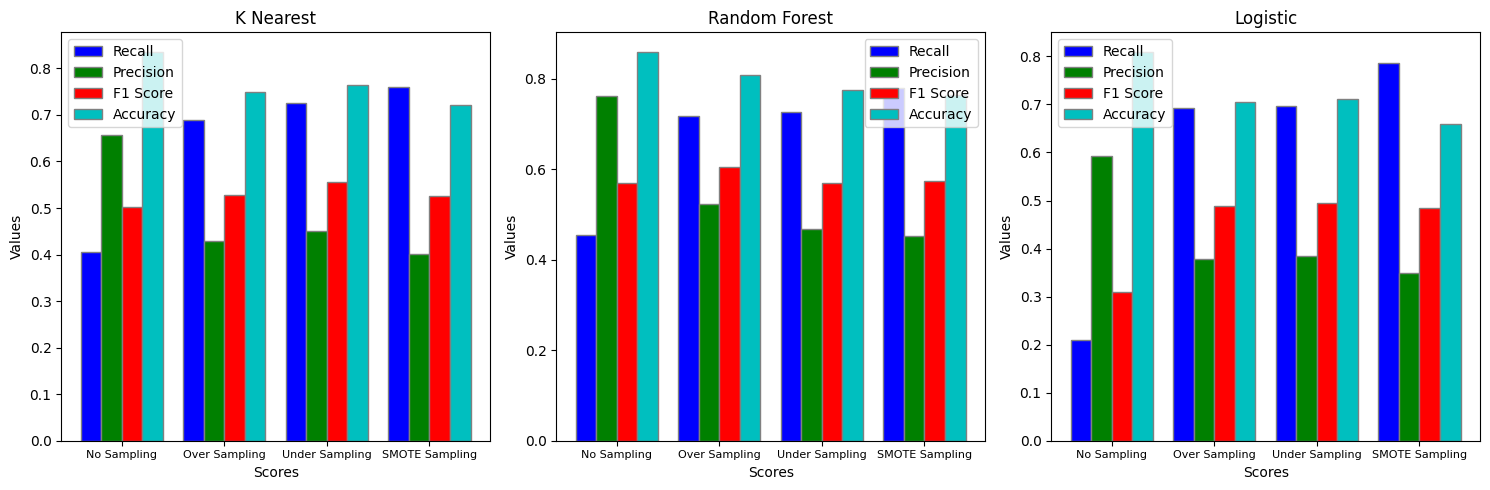

In [698]:
results_dict = {'K Nearest': predictions_knn,'Random Forest':predictions_rf,'Logistic': predictions_log}

# Create a 1x3 figure
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each chart
for i, (subset_name, subset_df) in enumerate(results_dict.items()):
    ax = axes[i]
    plot_results(subset_df, ax)
    ax.set_title(subset_name)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Results and Interpretations

As we can see from the above comparisons between the models, the accuracy of the models is very similar (80%) and does not tell us which model works better in this imbalanced dataset. Recall was quite low for the imbalanced data set with all 3 models without any sampling done. As we use the different sampling techniques, the recall of the model increases but at the cost of precision. 

The business will decide whether it wants to emphasize more on the false negatives (churned people classified as not churned) or false positives(not churned people classified as churned). In the case that it wants to decrease false positives, then precision will be considered. If both needs to be balanced then a more appropriate metric would be ROC AUC. 

In our case, the recall has considerably increased with different scaling techniques. Also note that the higher recall does not necessarily means that we overfitting, it means that the relevent positive samples are being correctly classified. Also note that these results are test set scores, i.e., applying models to unseen separate data. <b>The randomized sampling techniques are producing overfitting and the specialized SMOTE ENN is generalizing well when doing grid search</b>

<b>SMOTE Oversampling achieved best results by reducing overfitting as well as increasing recall.</b>
More better results are produced by Random Forest Classifier where recall has increased (76%) and accuracy stays same, however precision has been compromised
Our baseline kNN also increases the recall but at the cost of reduction in accuracy and precision.

### Which Model works best ?
- It depends on the business requirements

### Can we do better

Yes, there are plenty of opportunities for improvement 
- Choosing a different model that works better with the required tuning
- Choose a different metric for evaluation. 
- Choosing a different sampling technique
- Creating new features from the existing features would definitely increase the score

### <i>REFERENCES</i>

https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset/notebook

https://towardsdatascience.com/imbalanced-classification-in-python-smote-enn-method-db5db06b8d50
